In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
from FrequencyAbstraction import FourierTransformation
from sklearn.cluster import KMeans

# Load data

In [2]:
df = pd.read_pickle("../../data/interim/02_outliers_removed_chauvenets.pkl")
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,71
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,71
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,71


In [3]:
predictor_columns = list(df.columns[:6])
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [4]:
# Plotsetting
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

# Dealing with missing values (imputation)

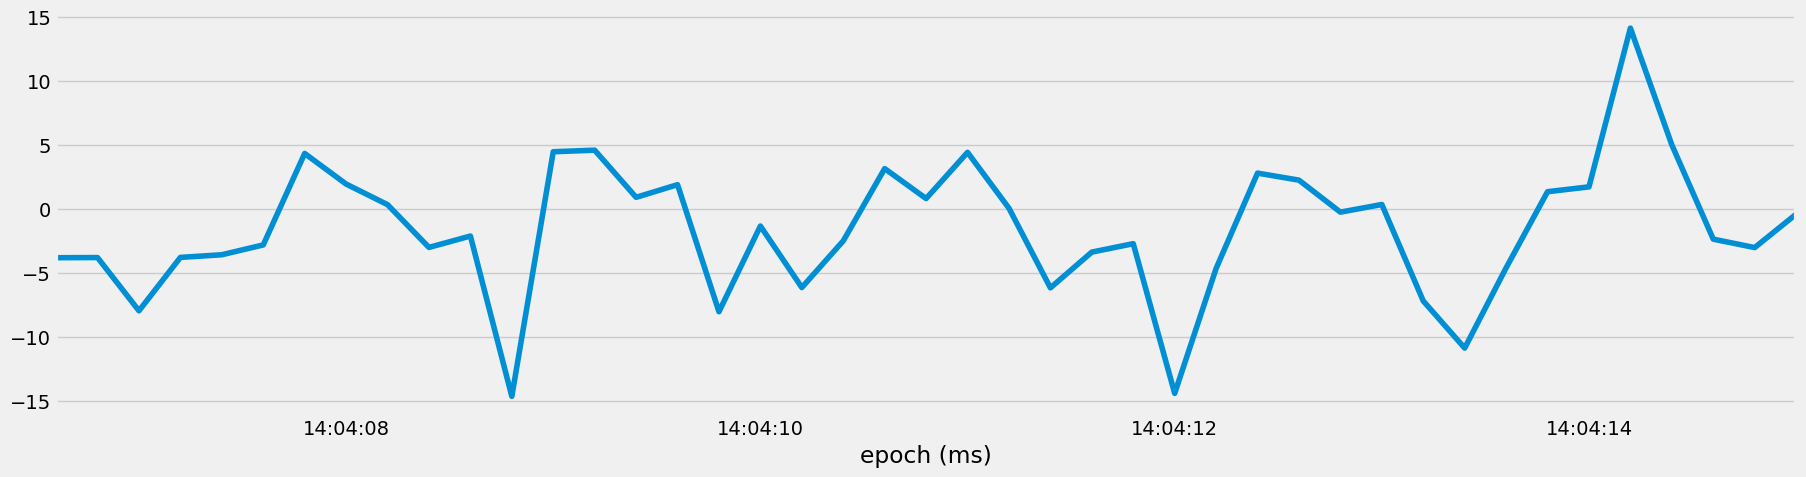

In [34]:
subset = df.query("set == 35")['gyr_y'].plot()


In [5]:
# Interpolate the missing values

for col in predictor_columns:
    df[col] = df[col].interpolate()

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participent  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


# Calculating set duration

In [36]:
df.query("set == 25")

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set
epoch (ms),,,,,,,,,,
2019-01-14 13:53:06.800,-0.390500,0.775500,-0.060500,-1.1222,4.9024,15.5002,A,ohp,heavy,25
2019-01-14 13:53:07.000,-0.377667,0.889667,-0.064333,-6.6344,3.5852,24.3902,A,ohp,heavy,25
2019-01-14 13:53:07.200,-0.255500,0.851500,-0.073500,-1.8412,3.0366,34.0368,A,ohp,heavy,25
2019-01-14 13:53:07.400,-0.199333,0.801000,-0.089000,9.6096,-19.5244,-0.1952,A,ohp,heavy,25
2019-01-14 13:53:07.600,-0.213000,0.885000,-0.095000,12.3904,-8.2802,-11.2316,A,ohp,heavy,25
...,...,...,...,...,...,...,...,...,...,...
2019-01-14 13:53:20.800,-0.253500,1.149000,-0.080500,10.6464,-4.5730,57.2804,A,ohp,heavy,25
2019-01-14 13:53:21.000,-0.122333,1.117333,-0.131667,8.9024,-0.9024,9.0856,A,ohp,heavy,25
2019-01-14 13:53:21.200,-0.066500,0.959500,-0.133000,-5.0610,-0.8412,5.2680,A,ohp,heavy,25


<AxesSubplot: xlabel='epoch (ms)'>

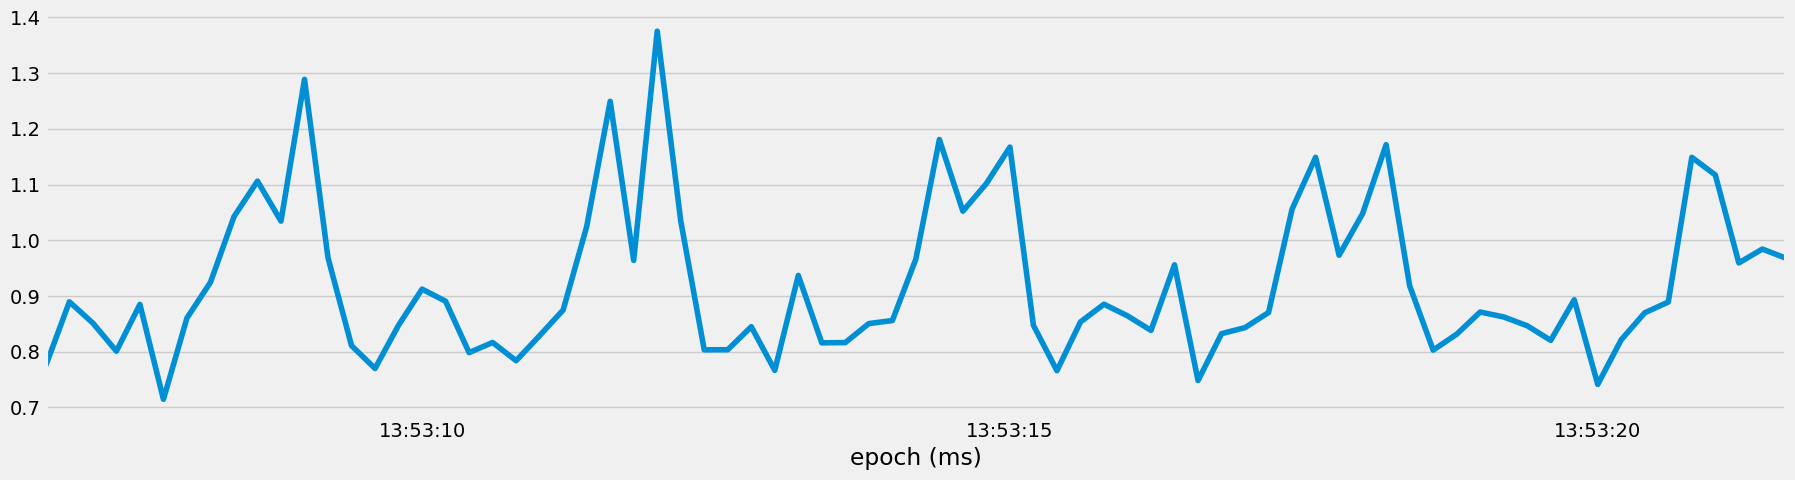

In [37]:
# heavy set consists of 5 reps (peaks)
df.query("set == 25")['acc_y'].plot()

<AxesSubplot: xlabel='epoch (ms)'>

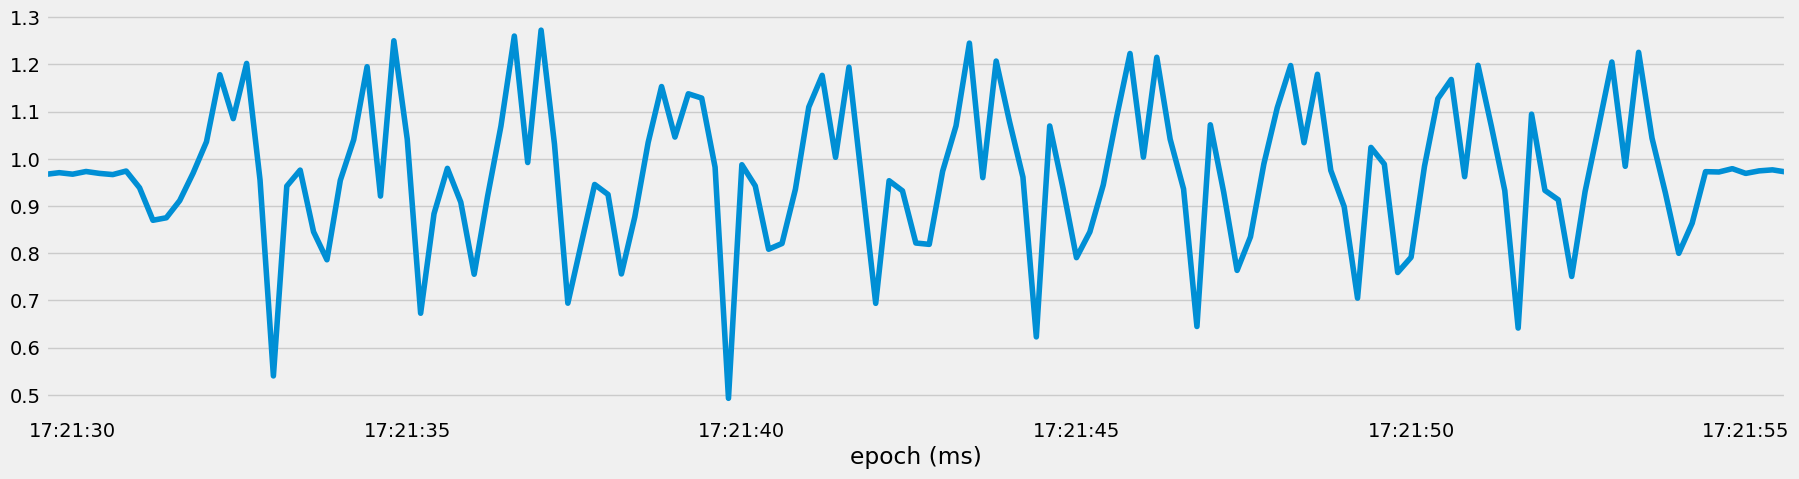

In [38]:
# medium set consists of 10 reps (peaks)
df.query("set == 50")['acc_y'].plot()

In [39]:
# calculation of time in each set
duration = df.query("set == 1").index[-1] - df.query("set == 1").index[0]

In [40]:
duration

Timedelta('0 days 00:00:20.400000')

In [6]:
# calculate the duration
for s in df["set"].unique():
    duration = (df.query(f"set == {s}").index[-1] - df.query(f"set == {s}").index[0]).seconds
    df.loc[(df["set"] == s), "duration"] = duration


In [7]:
duration_df = df.groupby("category")["duration"].mean()
duration_df

category
heavy       14.743501
medium      24.942529
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

In [8]:
# duration in each rep for heavy set and medium set
duration_df.iloc[0] /= 5
duration_df.iloc[1] /= 10

duration_df

category
heavy        2.948700
medium       2.494253
sitting     33.000000
standing    39.000000
Name: duration, dtype: float64

# Butterworth lowpass filter

In [9]:
df_lowpass = df.copy()

In [10]:
LowPass = LowPassFilter() # sampling_frequency: 200ms

fs = 1000/200
cutoff = 1.3 # trial and error -> we want smooth but still have some small pattern

In [11]:


df_lowpass = LowPass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order=5)
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,duration,acc_y_lowpass
epoch (ms),,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64,16.0,0.977003
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64,16.0,0.973169
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64,16.0,0.966879
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64,16.0,0.962244
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64,16.0,0.959572
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,71,19.0,-0.988153
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,71,19.0,-1.053448
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,71,19.0,-1.044737


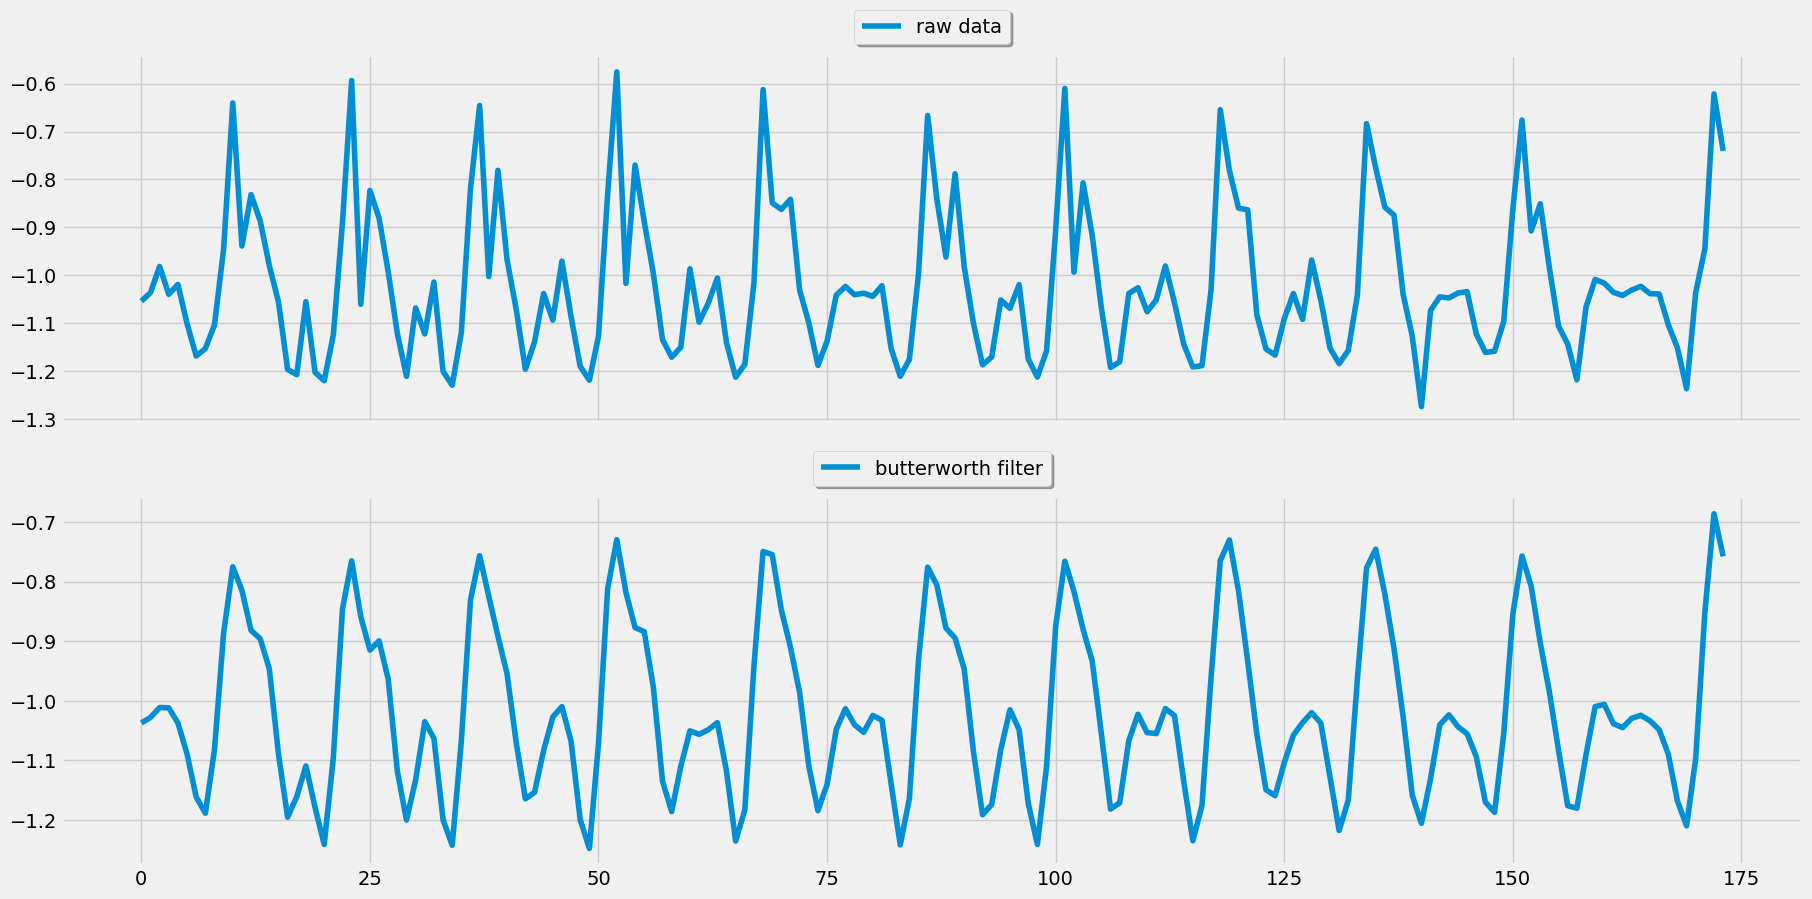

In [47]:
subset = df_lowpass[df_lowpass["set"] == 45]

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop=True), label="raw data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")

ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox = True, shadow=True)
ax[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox = True, shadow=True)

In [12]:
for col in predictor_columns:
    df_lowpass = LowPass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    df_lowpass[col] = df_lowpass[col+"_lowpass"]
    del df_lowpass[col+"_lowpass"]

In [13]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,64,16.0
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,64,16.0
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,64,16.0
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,64,16.0
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,64,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,19.0
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,71,19.0
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,71,19.0


# Principal component analysis PCA

In [14]:
df_pca = df_lowpass.copy()
PCA = PrincipalComponentAnalysis()
pc_values = PCA.determine_pc_explained_variance(df_pca, predictor_columns)


In [51]:
pc_values

array([0.57992901, 0.27309479, 0.06509761, 0.05306529, 0.01866432,
       0.01014897])

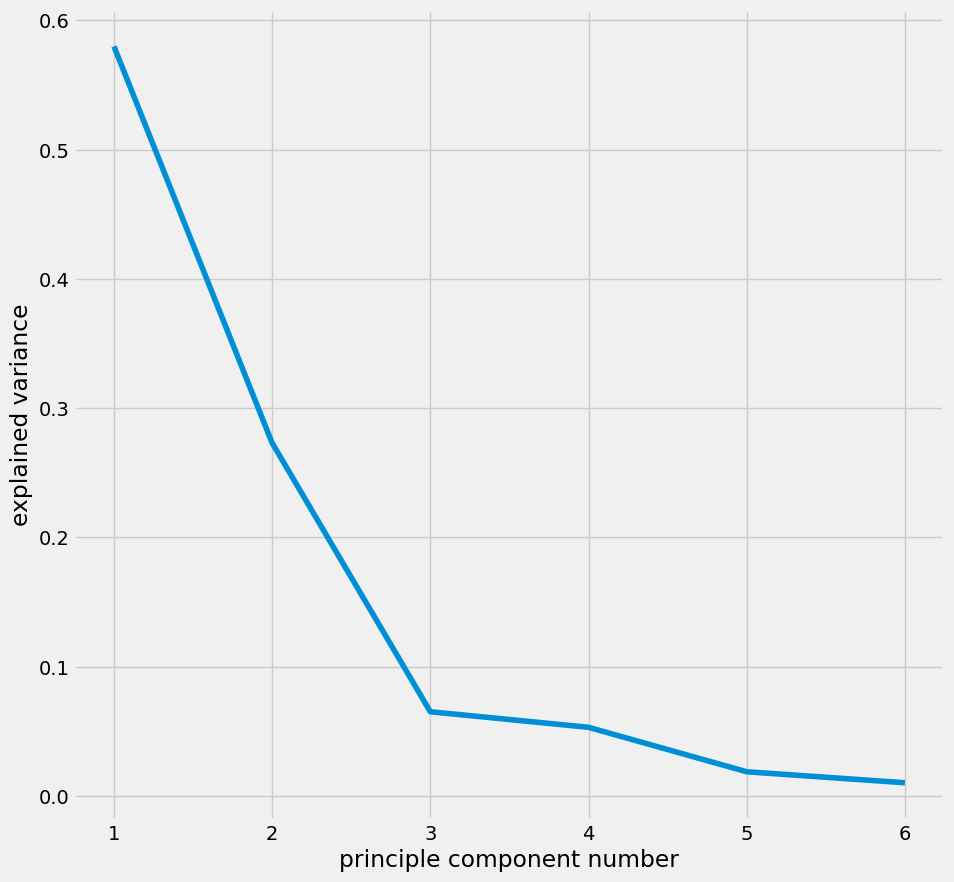

In [52]:
# Elbow technique => 3 is the optimal number of component
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(predictor_columns)+1), pc_values)
plt.xlabel("principle component number")
plt.ylabel("explained variance")
plt.show()

In [15]:
df_pca = PCA.apply_pca(df_pca, predictor_columns, 3)
df_pca # summarize acc_xyz, gyr_xyz to three columns while capturing the info as much as possible

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,64,16.0,-0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,64,16.0,-0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,64,16.0,-0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,64,16.0,-0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,64,16.0,-0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,19.0,0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,71,19.0,0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,71,19.0,0.368098,-0.153153,-0.058772


<AxesSubplot: xlabel='epoch (ms)'>

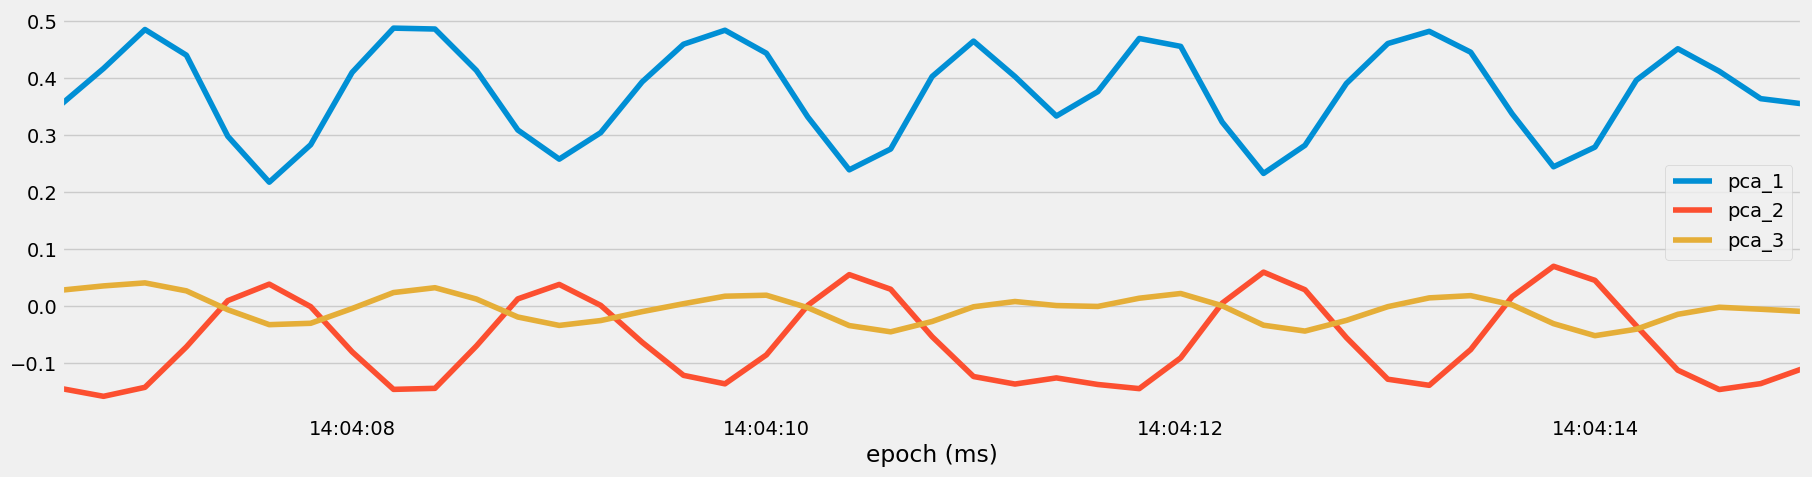

In [54]:
subset = df_pca[df_pca["set"] == 35]
subset[["pca_1", "pca_2", "pca_3"]].plot()

# Sum of squares attributes

In [16]:
df_squared = df_pca.copy()
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

In [17]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [18]:
df_squared

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,64,16.0,-0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,64,16.0,-0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,64,16.0,-0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,64,16.0,-0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,64,16.0,-0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,19.0,0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,71,19.0,0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,71,19.0,0.368098,-0.153153,-0.058772,1.047919,2.329568


array([<AxesSubplot: xlabel='epoch (ms)'>,
       <AxesSubplot: xlabel='epoch (ms)'>], dtype=object)

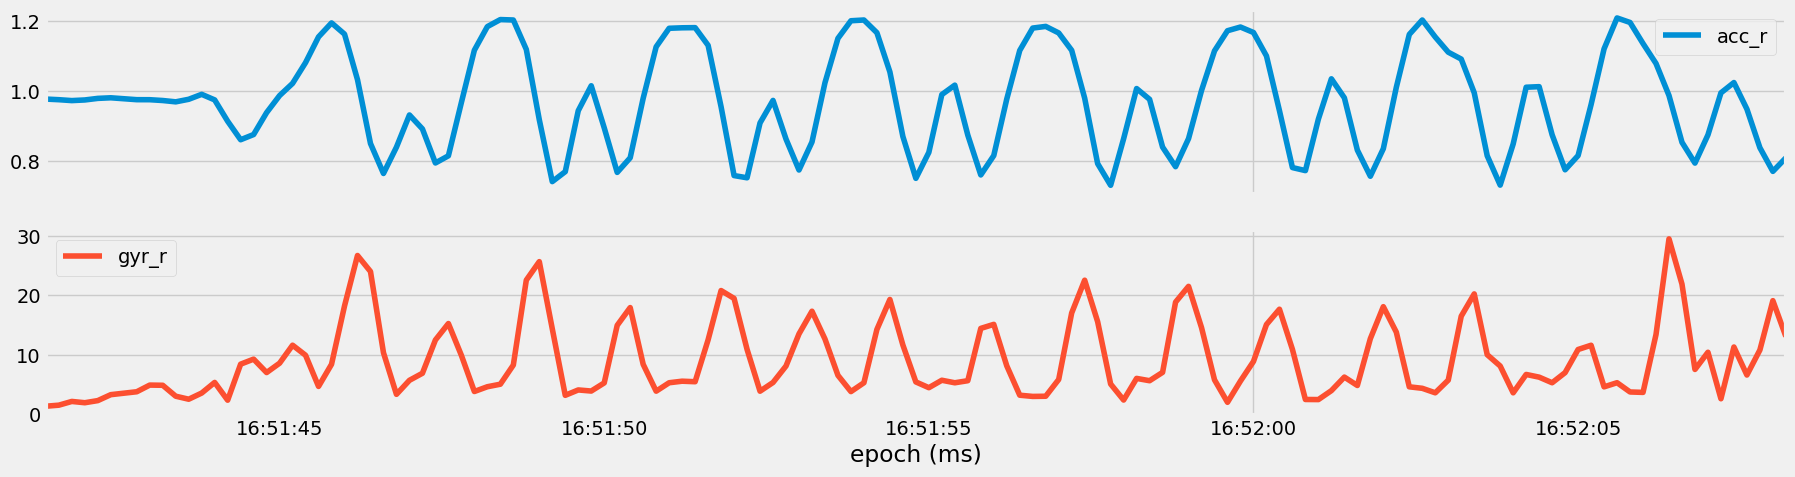

In [58]:
subset = df_squared[df_squared["set"] == 14]
subset[["acc_r", "gyr_r"]].plot(subplots=True)

# Temporal abstraction

In [19]:
df_temporal = df_squared.copy()
NumAbs = NumericalAbstraction()
predictor_columns = predictor_columns + ["acc_r", "gyr_r"]


In [20]:
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [21]:
ws = int(1000/200)

# calculate temporal abstraction based on different set
df_temporal_list = []
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in predictor_columns:
        subset = NumAbs.abstract_numerical(subset, [col], ws, "mean")
        subset = NumAbs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)


In [22]:
df_temporal = pd.concat(df_temporal_list)
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_x                 9009 non-null   float64
 1   acc_y                 9009 non-null   float64
 2   acc_z                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   participent           9009 non-null   object 
 7   label                 9009 non-null   object 
 8   category              9009 non-null   object 
 9   set                   9009 non-null   int64  
 10  duration              9009 non-null   float64
 11  pca_1                 9009 non-null   float64
 12  pca_2                 9009 non-null   float64
 13  pca_3                 9009 non-null   float64
 14  acc_r                 

<AxesSubplot: xlabel='epoch (ms)'>

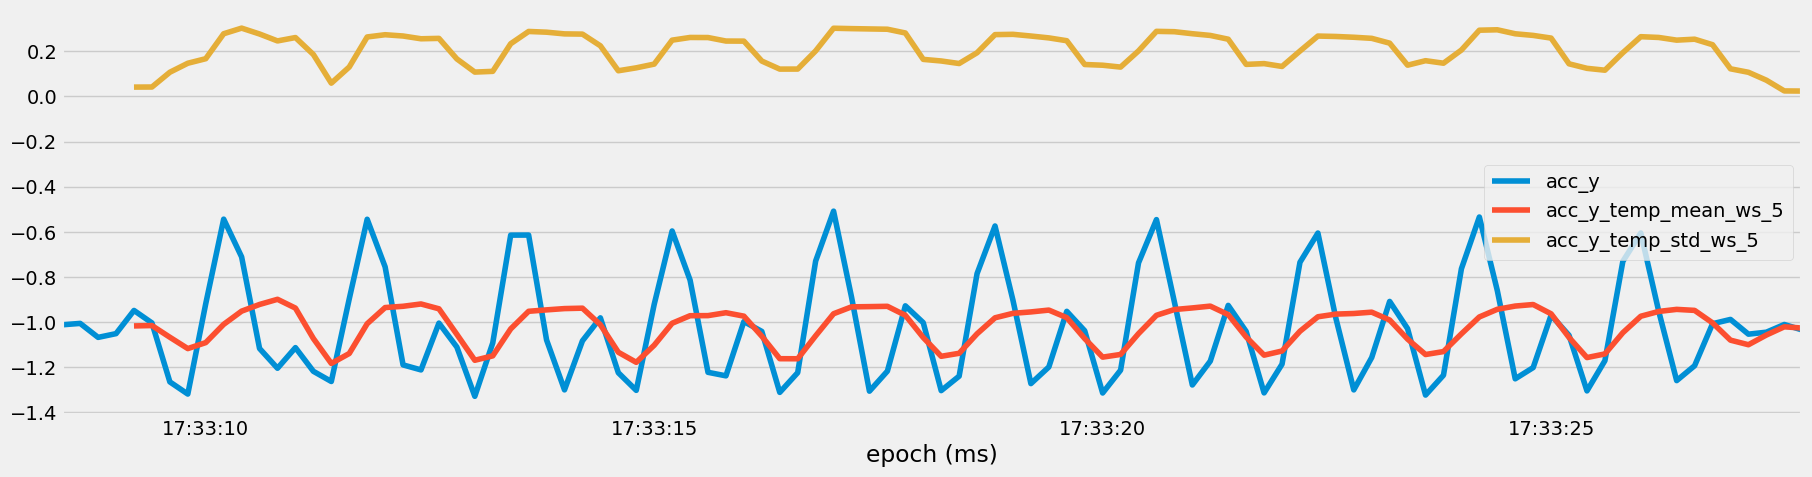

In [68]:
subset[["acc_y","acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5" ]].plot()

<AxesSubplot: xlabel='epoch (ms)'>

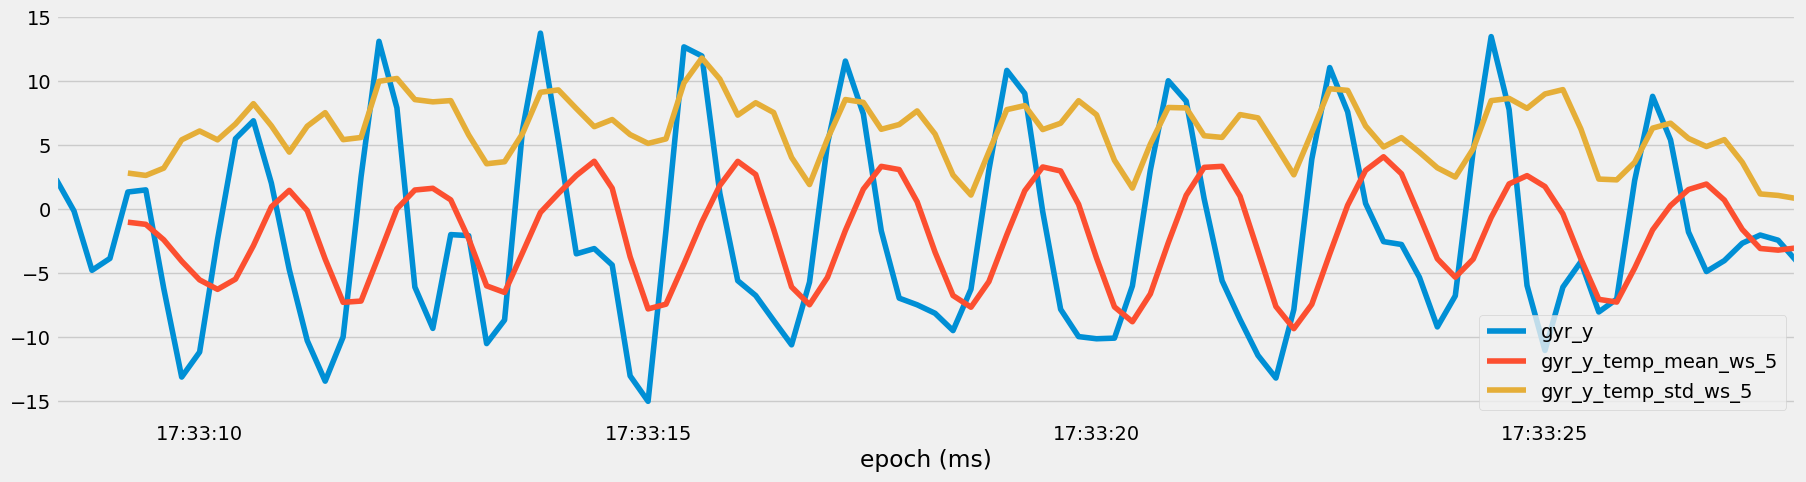

In [69]:
subset[["gyr_y","gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5" ]].plot()

# Frequency features

In [23]:
df_freq = df_temporal.copy().reset_index()
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,E,row,medium,...,2.006143,3.622861,-3.200450,1.071976,0.760034,0.532219,1.024177,0.024274,4.877383,2.369344


In [24]:
FreqAbs = FourierTransformation()
fs = int(1000/200)
ws = int(2800 / 200)
df_freq = FreqAbs.abstract_frequency(df_freq, ["acc_y"], ws, fs)
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,...,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,...,-0.366246,0.080086,-15.086721,0.169773,1.260702,0.908251,0.370038,0.284737,0.272604,0.270130
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,...,-0.189618,0.098206,-15.605886,-0.499724,1.034515,-1.036798,0.960714,0.363849,0.279607,0.252243
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,...,0.083718,0.054012,-15.790817,-0.732594,0.519170,-1.087010,-0.032387,-0.036956,-0.056240,-0.063536
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,E,row,medium,...,0.116557,0.041741,-15.550088,-0.433942,0.006282,0.624310,-0.794175,-0.262326,-0.198431,-0.178484


In [74]:
df_freq.columns

Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participent', 'label', 'category', 'set', 'duration', 'pca_1', 'pca_2',
       'pca_3', 'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5',
       'acc_x_temp_std_ws_5', 'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5',
       'acc_z_temp_mean_ws_5', 'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5',
       'gyr_x_temp_std_ws_5', 'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5',
       'gyr_z_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5',
       'acc_r_temp_std_ws_5', 'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5',
       'acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse',
       'acc_y_freq_0.0_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14',
       'acc_y_freq_0.714_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14',
       'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_1.786_Hz_ws_14',
       'acc_y_freq_2.143_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14'],
      dtype='object')

<AxesSubplot: >

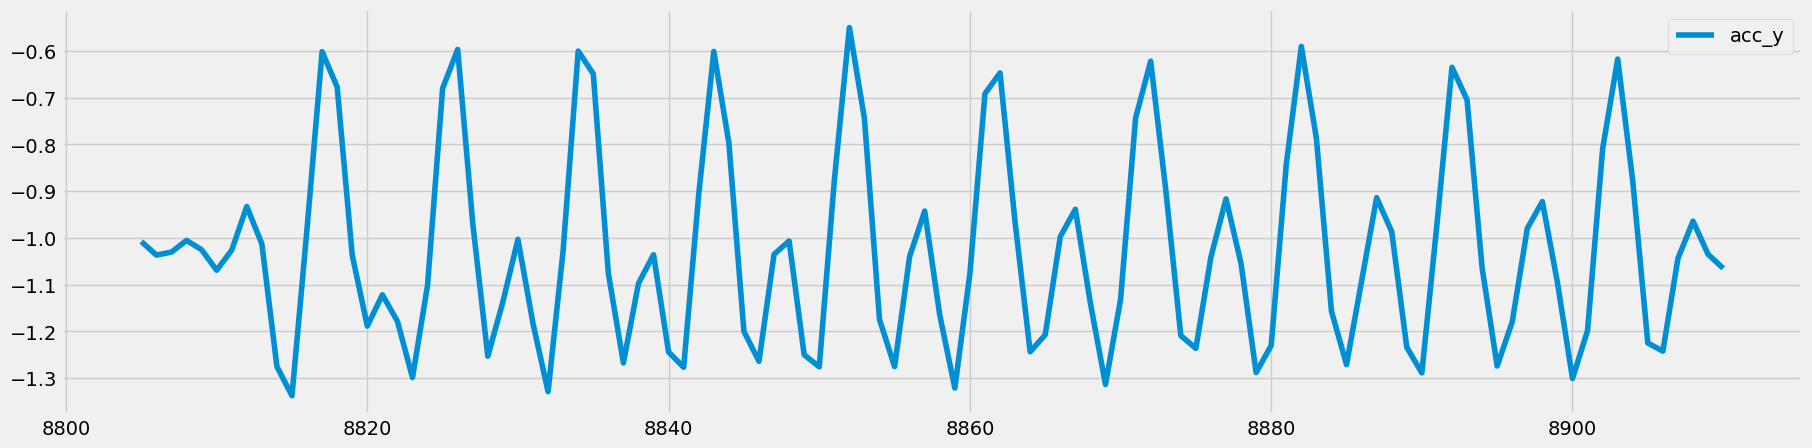

In [75]:
# visualize the results
subset = df_freq[df_freq["set"] == 15]
subset[["acc_y"]].plot()


<AxesSubplot: >

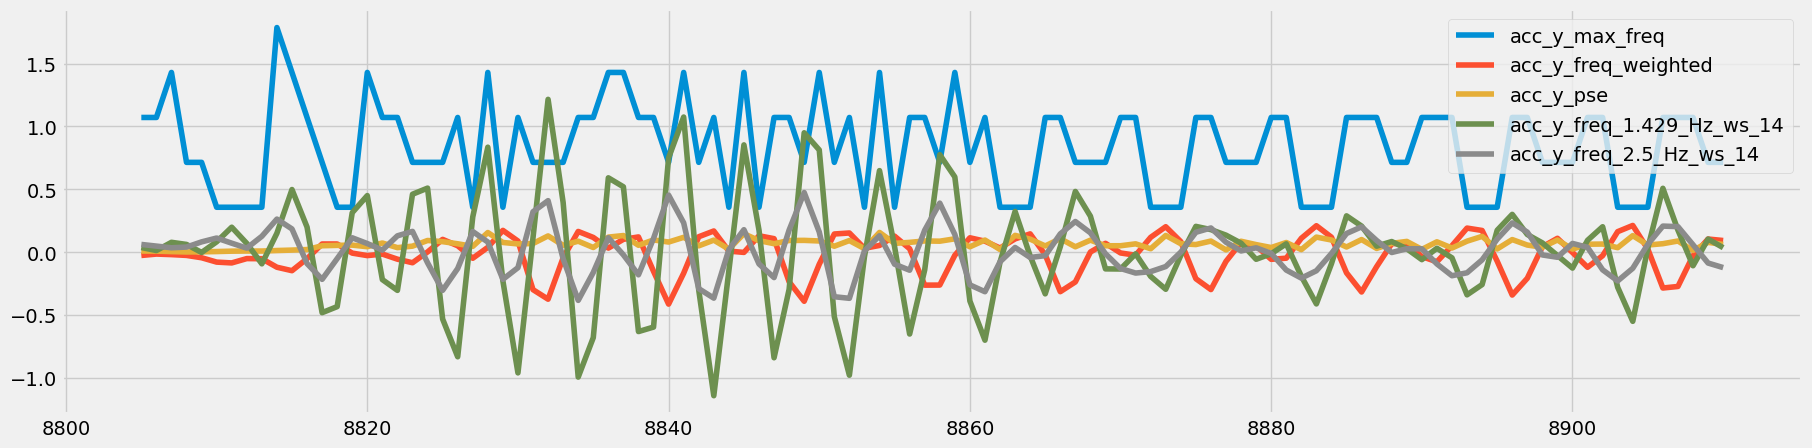

In [76]:
subset[['acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse', 'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14']].plot()

In [25]:
# calculate frequency abstraction based on different set
df_freq_list = []
for s in df_freq["set"].unique():
    print(f"Applying Fourier transform to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop=True).copy()
    subset = FreqAbs.abstract_frequency(subset, predictor_columns, ws, fs)
    df_freq_list.append(subset)

Applying Fourier transform to set 64
Applying Fourier transform to set 72
Applying Fourier transform to set 40
Applying Fourier transform to set 86
Applying Fourier transform to set 80
Applying Fourier transform to set 10
Applying Fourier transform to set 74
Applying Fourier transform to set 52
Applying Fourier transform to set 12
Applying Fourier transform to set 33
Applying Fourier transform to set 77
Applying Fourier transform to set 53
Applying Fourier transform to set 32
Applying Fourier transform to set 79
Applying Fourier transform to set 22
Applying Fourier transform to set 17
Applying Fourier transform to set 69
Applying Fourier transform to set 63
Applying Fourier transform to set 60
Applying Fourier transform to set 92
Applying Fourier transform to set 57
Applying Fourier transform to set 7
Applying Fourier transform to set 16
Applying Fourier transform to set 26
Applying Fourier transform to set 67
Applying Fourier transform to set 75
Applying Fourier transform to set 89
Ap

In [26]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop=True)
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,B,bench,heavy,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,B,bench,heavy,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,B,bench,heavy,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,B,bench,heavy,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,B,bench,heavy,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,71,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,71,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


# Dealing with overlapping windows

In [28]:
df_freq = df_freq.dropna()

In [29]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,64,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,-0.075541,0.854894,-0.094507,-17.787623,-7.152388,16.679304,B,bench,heavy,64,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,64,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.600,-0.039468,0.947898,-0.047164,1.731909,-0.126808,-3.356740,B,bench,heavy,64,...,-0.051046,0.608396,265.472278,-54.366043,-70.788251,-14.043211,32.170170,36.805962,-27.594837,9.354092
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,64,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,E,row,medium,71,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,E,row,medium,71,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [31]:
df_freq = df_freq.iloc[::2] # reduce the possibility of overfitting since the values are overlappedf 

# Clustering

In [33]:
df_cluster = df_freq.copy()
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10) # elbow method to determine optimal k
inertias = []

for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    cluster_Labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)


/Users/jhsu12/opt/anaconda3/envs/tracking-barbell-exercises/lib/python3.8/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [34]:
inertias

[888.2145379895438,
 513.7868949414765,
 315.9388838213688,
 234.30076852770614,
 209.18733836503532,
 185.88222426924685,
 165.5392824765207,
 147.17977465890488]

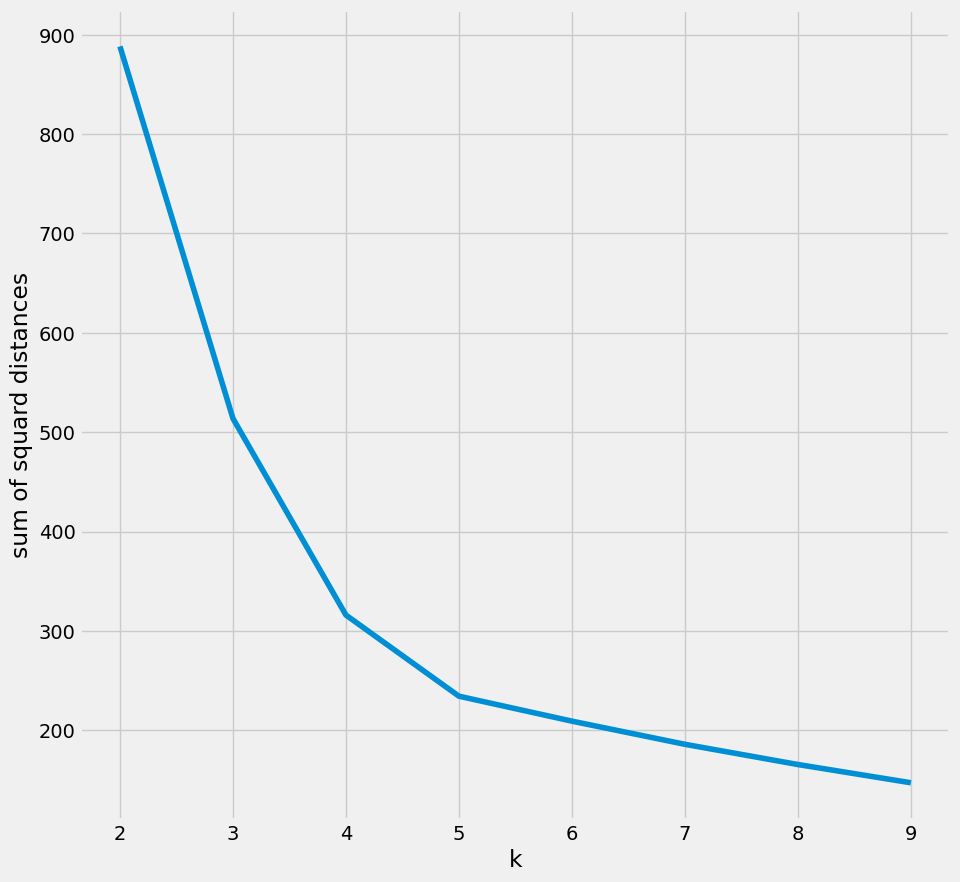

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("sum of squard distances")
plt.show()

In [36]:
# optimal k =4 or 5
subset = df_cluster[cluster_columns]
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
df_cluster["cluster"] = kmeans.fit_predict(subset)
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,64,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,64,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,64,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,64,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,64,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,71,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,71,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


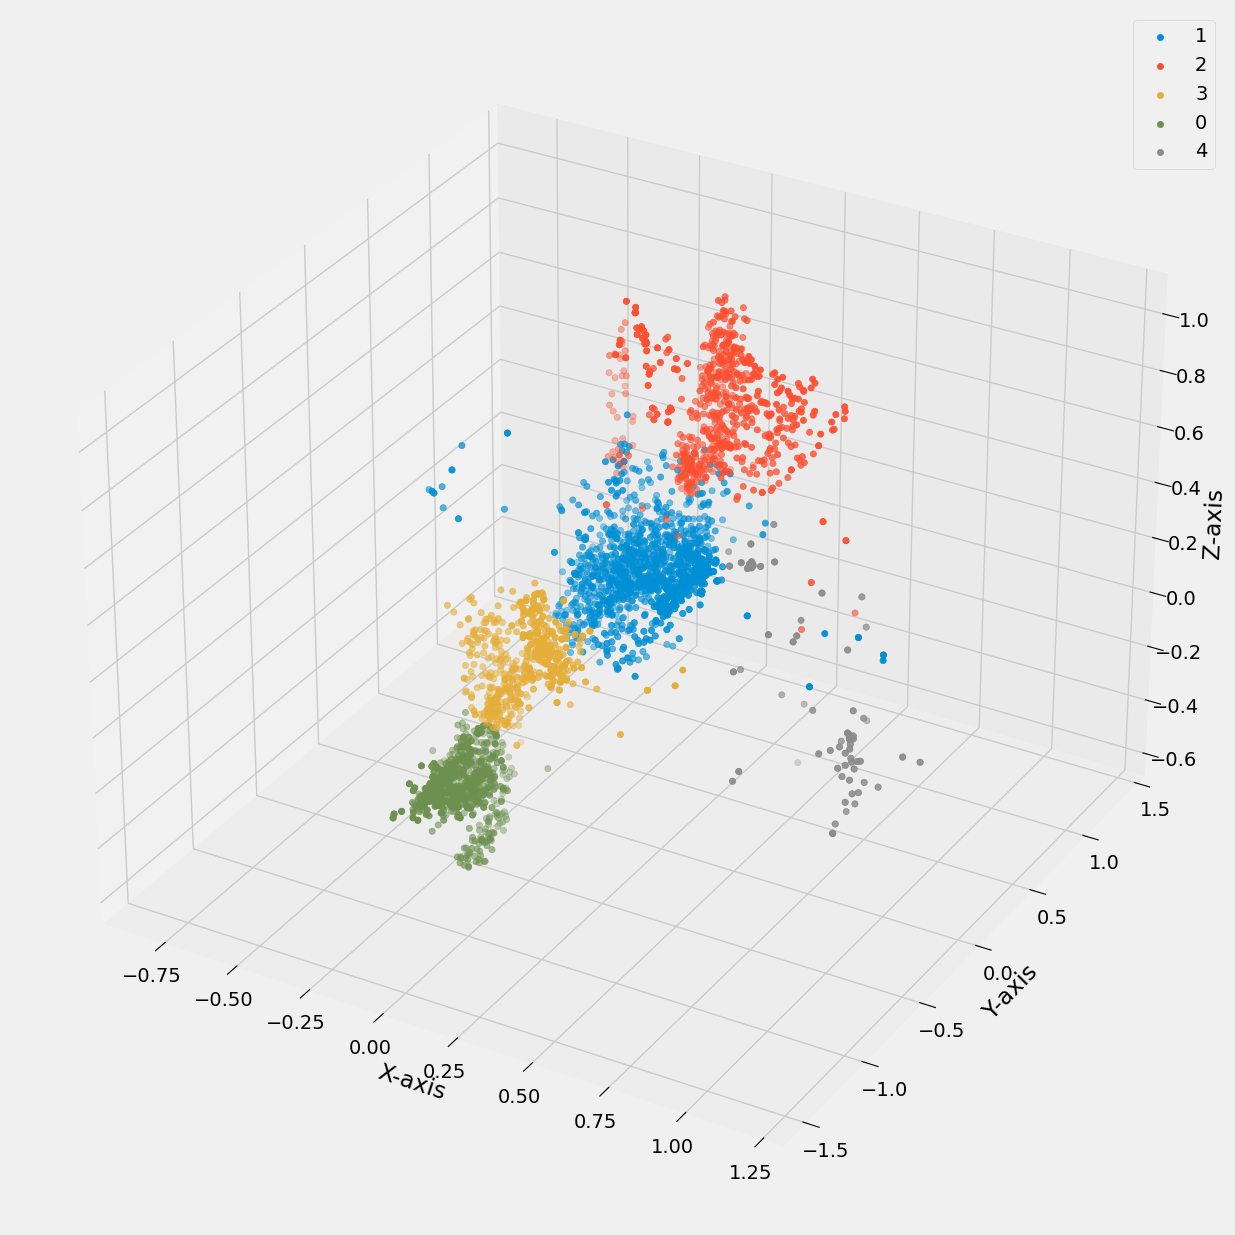

In [37]:
# Plot cluster
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

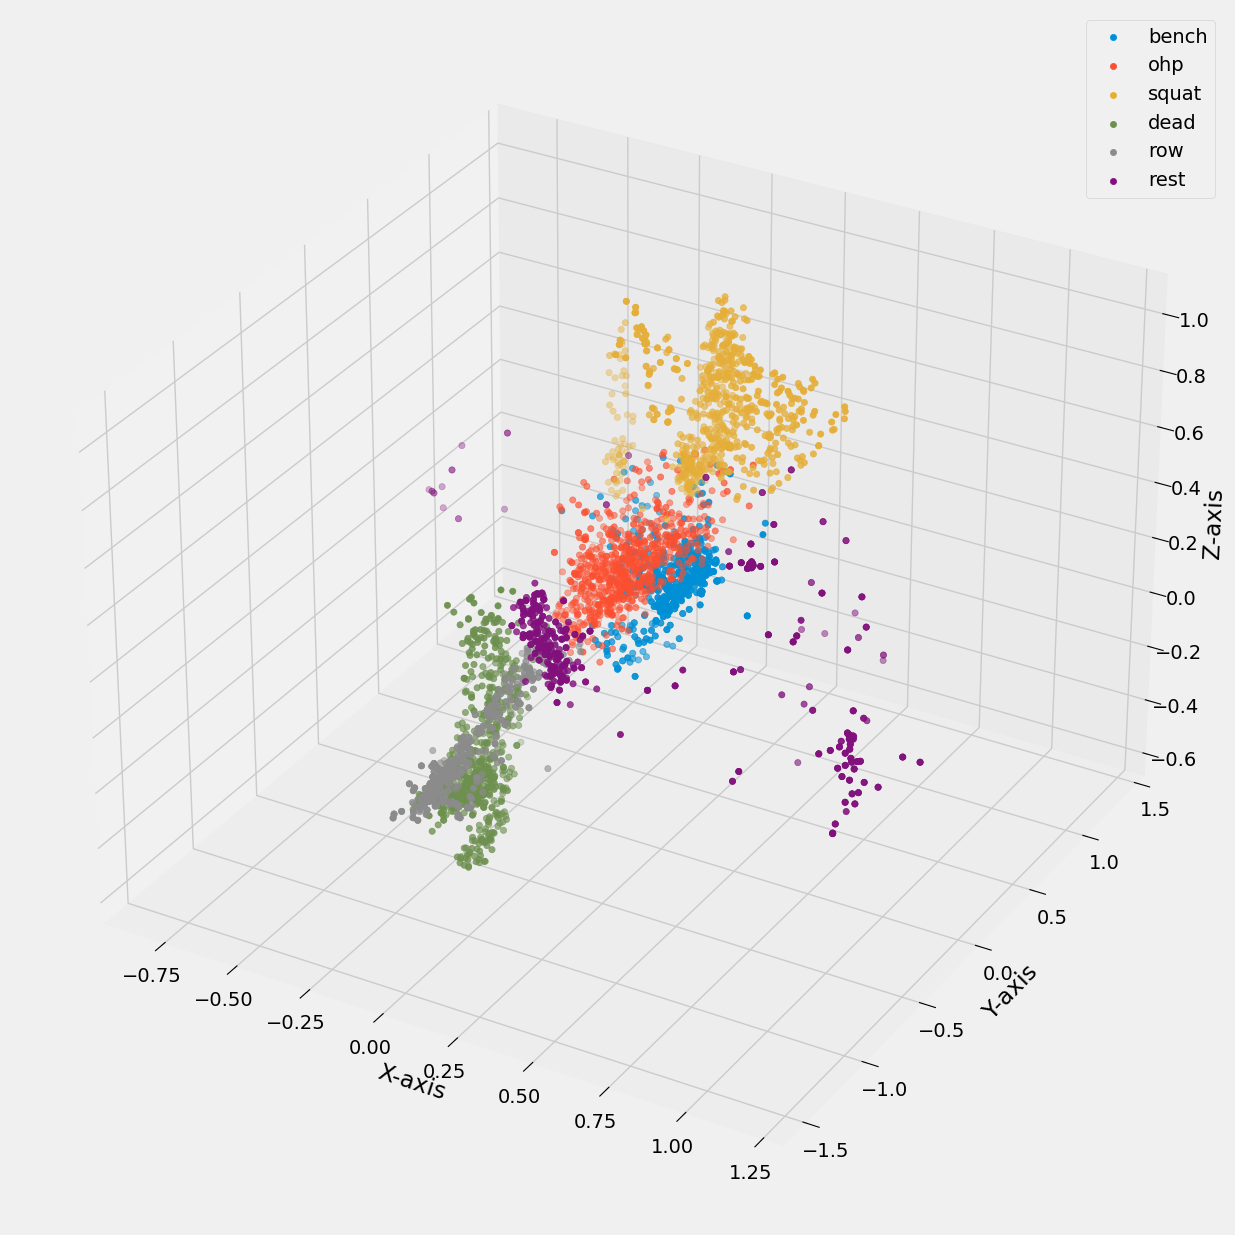

In [38]:
# Plot accelerometer data to compare
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection="3d")
for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=l)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

# Export dataset

In [39]:
df_cluster.to_pickle("../../data/interim/03_data_features.pkl")